<a href="https://colab.research.google.com/github/gohzhihwee/stuffs/blob/main/mscfe600_gwp3_5_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Python libraries
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt
import pandas as pd

# **Money Lending Scenario: Money at a Floating Rate for an Unsecured Purchase (Scenario #2)**

# **The Context**
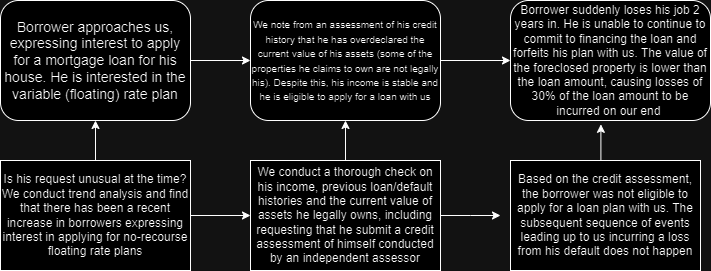

We present above an example of a workflow where our lending firm engages in correspondence with a borrower who is interested in and has applied for a mortgage loan with our lending firm. The borrower appears to have a higher credit risk and a greater probability of default based on what can be inferred from the documented credit history he has supplied us. The timeline outlined in rounded rectangles represents the undesirable scenario, which occurs when risk management practices have not been incorporated into the process of assessing and verifying the credit history of this borrower. However, by incorporating a basic risk management process which entails requiring the buyer to be honest about his credit history, as outlined in the positive timeline of events (represented by rectangular cells), we would find that he is ineligible to apply for a loan plan with us. The lending firm would thus have avoided significant financial losses at a later date by engaging in a loan with the borrower, as represented by the final rounded rectangular cell in the undesirable timeline of events.

# **The Workflow: Following the Rectangular Sequence of Events in the Context**

The following simulations and analysis aim to reflect basic guidelines for our lending firm when engaging with potential loan applicants. The guidelines are meant to apply to loan applications of all personal and credit backgrounds and do not discriminate against particular circumstances outside of those indicative of ability to financially commit to loan programs. It is important to recognize that an individual borrower rarely presents a unique credit profile, but is reflective of a demographic of borrowers with similar financial circumstances and habits regarding loan commitments. Profiling the credit risk of a borrower with respect to more macroscopic categories of borrower profiles can thus effectively reduce the lending firm's exposure to credit risk and hence financial losses.

We assume that the above context is set in the United States and stretches over a timeline of 3 years, spanning 2019 to 2022. Data presented in the following graphics hence spans this period.

\**Credit Risk Management Step #1: Understanding the Borrower as a Product of his Time**

Is the prospective borrower one of many prospective borrowers looking to take advantage of low property prices and low interest rates in the period that he expresses interest in committing to a loan program? To gain a deeper understanding of possible external reasons compelling the borrower to apply for a housing loan, the lending firm not only needs to consider the borrower's personal situation and reasons, but also the likelihood of external economic reasons which make the time the right time for the borrower to apply for a loan. To get an understanding of the external economic context, we plot the changes in real GDP growth in the United States, alongside the changes in real property prices and 5/1 interest rates with time during this period.

In [ ]:
# Load the relevant datasets
US_GDP_data = pd.read_csv("GDPC1.csv")
real_hprice_data = pd.read_csv("QUSR368BIS.csv")
adj_mortir_data = pd.read_csv("MORTGAGE5US.csv")
mort_defa_data = pd.read_csv("DRSREACBS.csv")

In [ ]:
# Standardize the time horizon of analysis before comparing datasets. Since the smallest time window we have for our data is from 2019-2022,
# we can use all data between the years 2019 and 2022. We will use this function and time range for all datasets in this program.
from datetime import datetime
start_date, end_date = "2019-01-01", "2022-12-31"
def standardize_timesteps(start_date, end_date, dataset):
  for i in range(len(dataset)):
    if 'Rating Date' in dataset.columns:
        dataset = dataset.rename(columns={"Rating Date": "DATE"})
    if 'Volume' in dataset.columns or 'Turnover' in dataset.columns:
      dataset.loc[i,'DATE'] = f"{int(dataset.loc[i,'DATE'])}-01-01"
      dataset.loc[i,'DATE'] = datetime.strptime(dataset.loc[i,'DATE'], "%Y-%M-%d")
      dataset.loc[i,'DATE'] = datetime.strftime(dataset.loc[i,'DATE'], "%Y-%M-%d")
      dataset.loc[i,'DATE'] = pd.to_datetime(dataset.loc[i,'DATE'], utc=True)
    else:
      dataset.loc[i,'DATE'] = pd.to_datetime(dataset.loc[i,'DATE'], utc=True)

  mask = (dataset['DATE'] > pd.to_datetime(start_date, utc=True)) & (dataset['DATE'] <= pd.to_datetime(end_date, utc=True))
  dataset = dataset.loc[mask]
  return dataset

In [ ]:
US_GDP_data = standardize_timesteps(start_date, end_date, US_GDP_data)
real_hprice_data = standardize_timesteps(start_date, end_date, real_hprice_data)
mort_defa_data = standardize_timesteps(start_date, end_date, mort_defa_data)
adj_mortir_data = standardize_timesteps(start_date, end_date, adj_mortir_data)

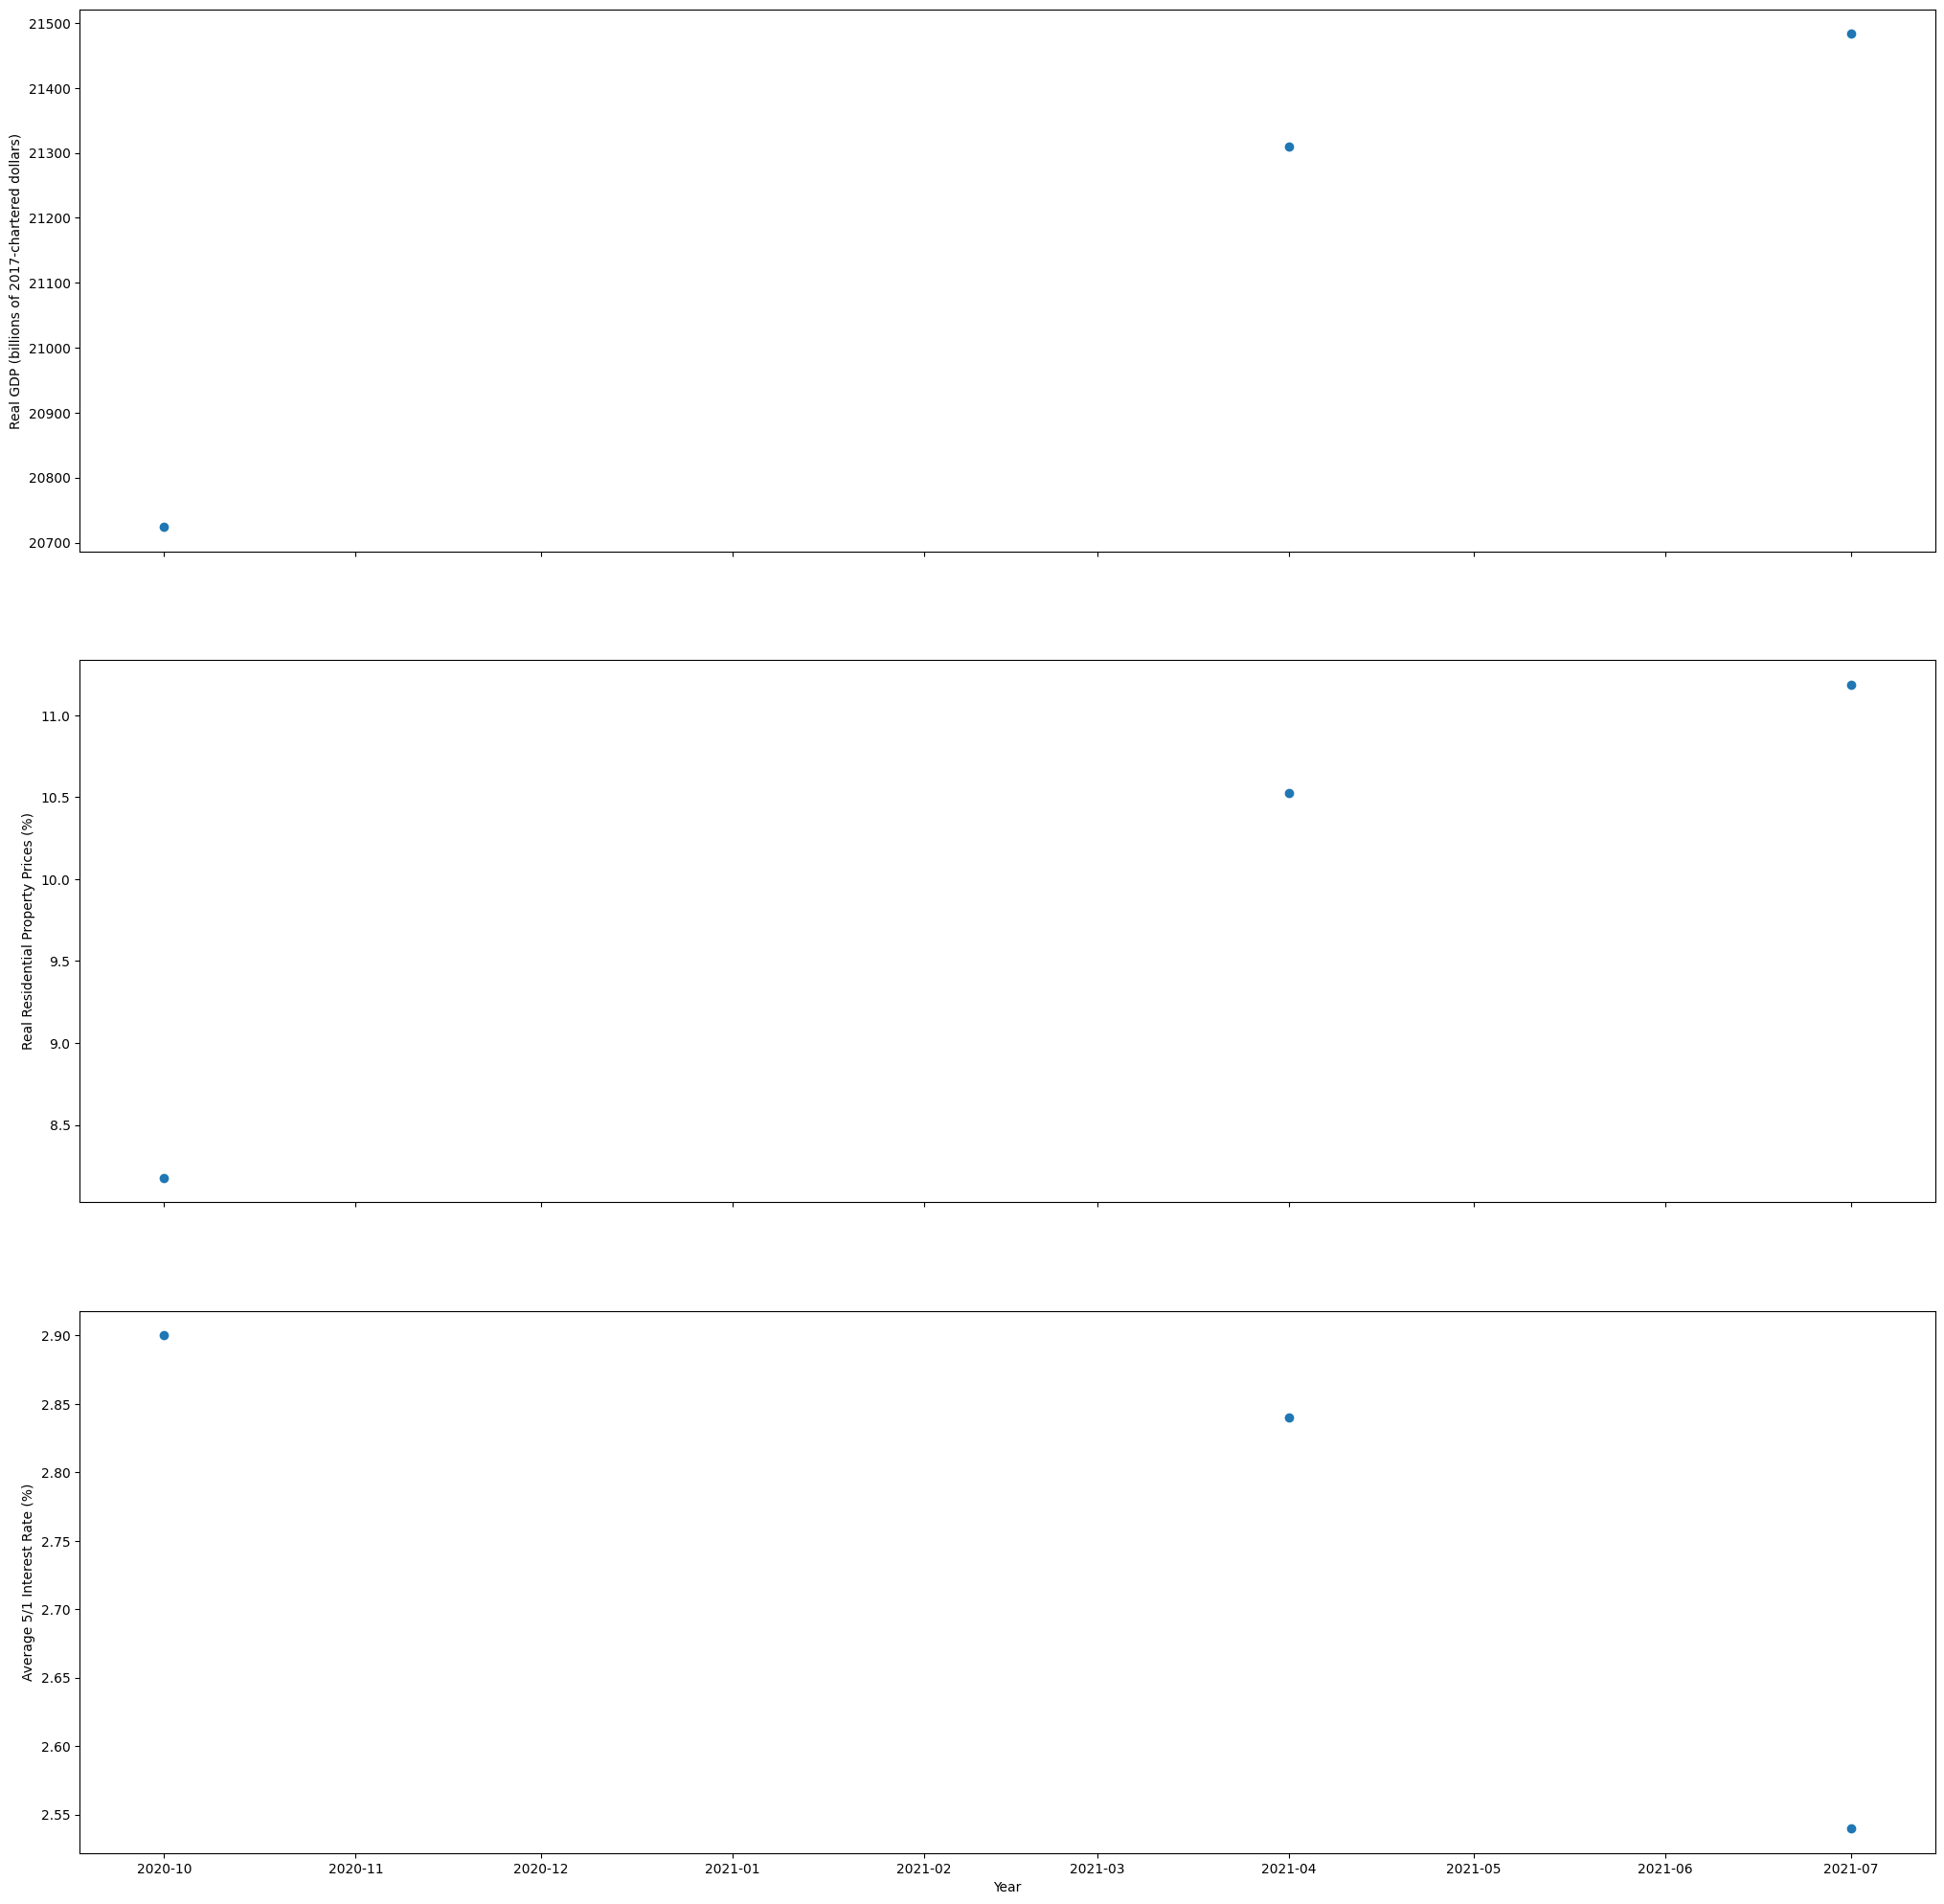

In [ ]:
adj_mortir_data = pd.merge(pd.merge(adj_mortir_data,US_GDP_data,on='DATE'),real_hprice_data,on='DATE').fillna(0)
# fig, ax = plt.subplots(3, 1, figsize=(15,15))
fig, ax = plt.subplots(3, 1, figsize=(25,25), sharex=True)
ax[0].scatter(adj_mortir_data['DATE'], adj_mortir_data['GDPC1'])
ax[1].scatter(adj_mortir_data['DATE'], adj_mortir_data['QUSR368BIS'])
ax[2].scatter(adj_mortir_data['DATE'], adj_mortir_data['MORTGAGE5US'])
plt.xlabel('Year')
# ax[0].set_xlabel('Year')
# ax[1].set_xlabel('Year')
# ax[2].set_xlabel('Year')
ax[0].set_ylabel('Real GDP (billions of 2017-chartered dollars)')
ax[1].set_ylabel('Real Residential Property Prices (%)')
ax[2].set_ylabel('Average 5/1 Interest Rate (%)')
plt.show()

**Credit Risk Management Step #2: How Likely is the Borrower to Default?**

Beyond the picture of our given borrower applying for a loan, what is the number of borrowers like him taking up similar housing loans during this period, and what is the likelihood of default for any given borrower who takes up such a loan then? To visualise macroscopic statistics in this domain, we also plot the number of floating-rate mortgage loans as a percentage of all loans with time, as well as the rate of mortgage loan delinquencies during this period. Displaying this alongside our 3 plots from earlier, we can obtain a more holistic picture of the borrower's behaviour as characteristic of borrowing trends at this time.

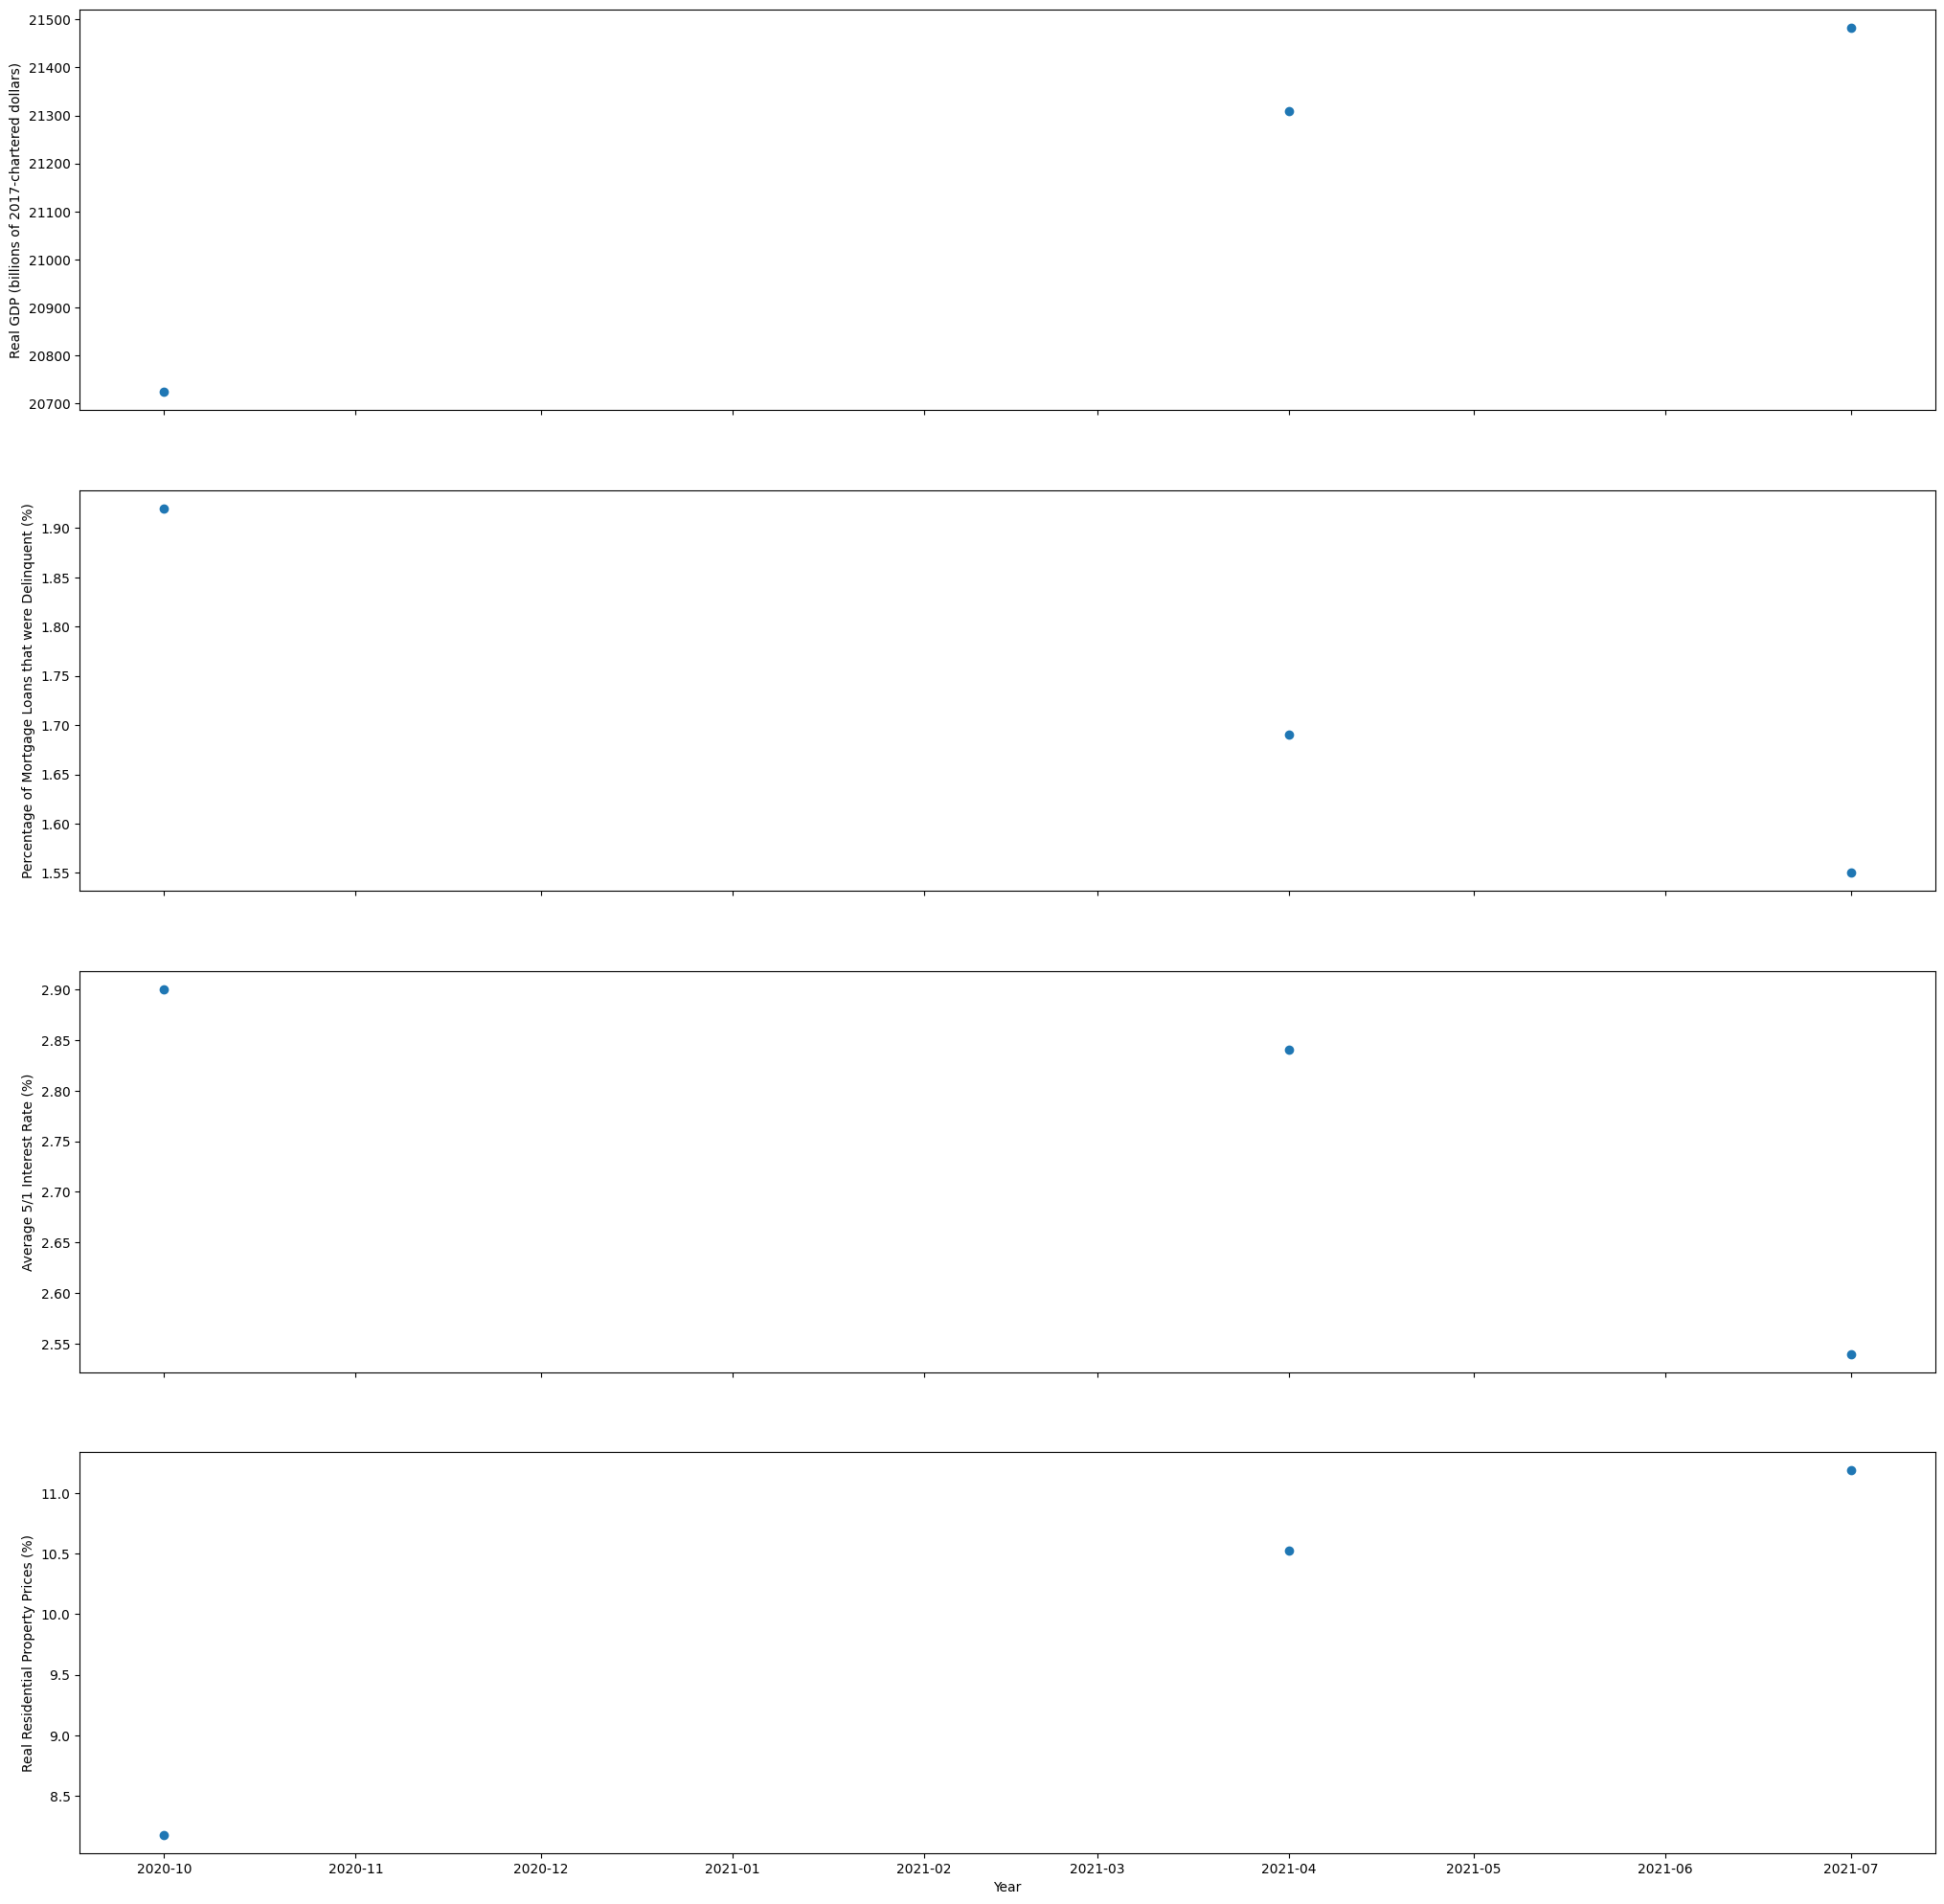

In [ ]:
# Reload the adjustable mortage interest rates dataset as its properties have changed in the previous cell
adj_mortir_data = pd.read_csv("MORTGAGE5US.csv")
# Standardize its time window and merge it with the mortgage default rates dataset alongside other important datasets
adj_mortir_data = standardize_timesteps(start_date, end_date, adj_mortir_data)
mort_defa_data = pd.merge(pd.merge(pd.merge(mort_defa_data,US_GDP_data,on='DATE'),adj_mortir_data,on='DATE'),real_hprice_data,on='DATE').fillna(0)
# fig, ax = plt.subplots(4, 1, figsize=(15,15))
fig, ax = plt.subplots(4, 1, figsize=(25,25), sharex=True)
ax[0].scatter(mort_defa_data['DATE'], mort_defa_data['GDPC1'])
ax[1].scatter(mort_defa_data['DATE'], mort_defa_data['DRSREACBS'])
ax[2].scatter(mort_defa_data['DATE'], mort_defa_data['MORTGAGE5US'])
ax[3].scatter(mort_defa_data['DATE'], mort_defa_data['QUSR368BIS'])
plt.xlabel('Year')
# ax[0].set_xlabel('Year')
# ax[1].set_xlabel('Year')
# ax[2].set_xlabel('Year')
# ax[3].set_xlabel('Year')
ax[0].set_ylabel('Real GDP (billions of 2017-chartered dollars)')
ax[1].set_ylabel('Percentage of Mortgage Loans that were Delinquent (%)')
ax[2].set_ylabel('Average 5/1 Interest Rate (%)')
ax[3].set_ylabel('Real Residential Property Prices (%)')
plt.show()

We observe from the graphics that alongside growing real GDP and lower interest rates, mortgage loan uptakes are increasing. This suggests that increased consumer confidence has motivated more borrowers of various credit profiles to apply for housing loans, and hence that the borrower before us will likely be influenced by the similar extrinsic economic motivations as well. Simultaneously, given the higher credit risk posed by the borrower in the above context, the lending firm would have to exercise additional caution in validating the borrower's credit profile and history. Stringent checks must be conducted on documentation that the borrower supplies and external assessments on their credit standing must be commissioned in the event of inconsistencies in the borrower's profile, as outlined in our given context.

**Credit Risk Management Step #3: Has the Borrower been honest about his Credit?**

As outlined in the contextual scenario above, it turns out that the borrower had falsified some aspects of his credit history. This not only indicates a lack of trustworthiness on his part, but also a higher credit risk than what can be estimated from his credit history. From the perspective of our lending firm, it would be more sensible to not engage in a business transaction with this borrower, leading us to the final stage of the rectangular workflow, which is to reject his application entirely. This would have saved the lending firm from the worst case scenario involving this borrower - significant financial loss from his failure to continue financing the loan.

# **Securities Lending Scenario: Publicly Traded ETF (Scenario #4)**

# **The Context**
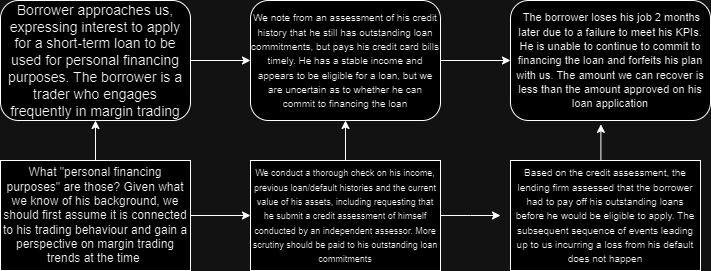

In this scenario, our lending firm is approached by a loan applicant who works as a trader and has a history of margin trading, with Exchange-Traded Funds (ETFs) being his favourite asset class. He has just approached us to apply for a securities loan, with his choice of security being an ETF. It appears that he has a history of borrowing to finance his trades, but has yet to fully pay off his previous approved loans. Nonetheless, he has a stable job at the present time and appears financially able to commit to the loan program based on his current income and net asset value. Margin trading is considered a risky business with indefinite downsides, while trading is an occupation in which employment prospects are highly contingent on market conditions. The lending firm has to consider both factors in deciding whether to approve his application. Additionally, extrinsic economic factors have to be considered as well, as the following analysis will demonstrate.

# **The Workflow: Following the Rectangular Sequence of Events in the Context**

In considering a borrower's credit profile when deciding whether or not to approve their application, it is imperative that the lending firm not just assess the borrower as an individual, but also consider the borrower's behaviour as potentially being characteristic of borrowing trends for the purposes that they have stated on the application. Positive economic conditions and outlooks can motivate borrowers and investors of various credit standings to apply for loans to engage in behaviours such as trading and the purchasing of property, and are in themselves no indication that said borrowers will be able to commit to financing their loans completely. Hence, broader economic trends pertaining to borrowing behaviours around the borrower's stated purpose must be considered alongside their personal financial circumstances.

The following analysis is set in the United States and spans a period of 3 years, from 2019-2022. All visualized data hence occurs during this time window.

**Credit Risk Management Step #1: Is there good reason for the borrower to borrow for Trading purposes now?**

To answer this question, the lending firm has to engage in trend analysis. The context in which to visualize trends here would be the changes in economic output (measured by quantities such as real GDP) with time during this period, as well as the percentage of loans issued by large financial institutions for the purposes of trading. This will enable the firm to obtain a better picture of the external economic situation which is likely to have motivated the borrower before us to apply for a personal finance loan.

In [ ]:
# Load the relevant datasets
US_GDP_data = pd.read_csv("GDPC1.csv")
etf_data = pd.read_csv("BOGZ1LM564091600Q.csv")
margin_loan_data = pd.read_csv("BOGZ1FL663067003Q.csv")

In [ ]:
US_GDP_data = standardize_timesteps(start_date, end_date, US_GDP_data)
etf_data = standardize_timesteps(start_date, end_date, etf_data)
margin_loan_data = standardize_timesteps(start_date, end_date, margin_loan_data)

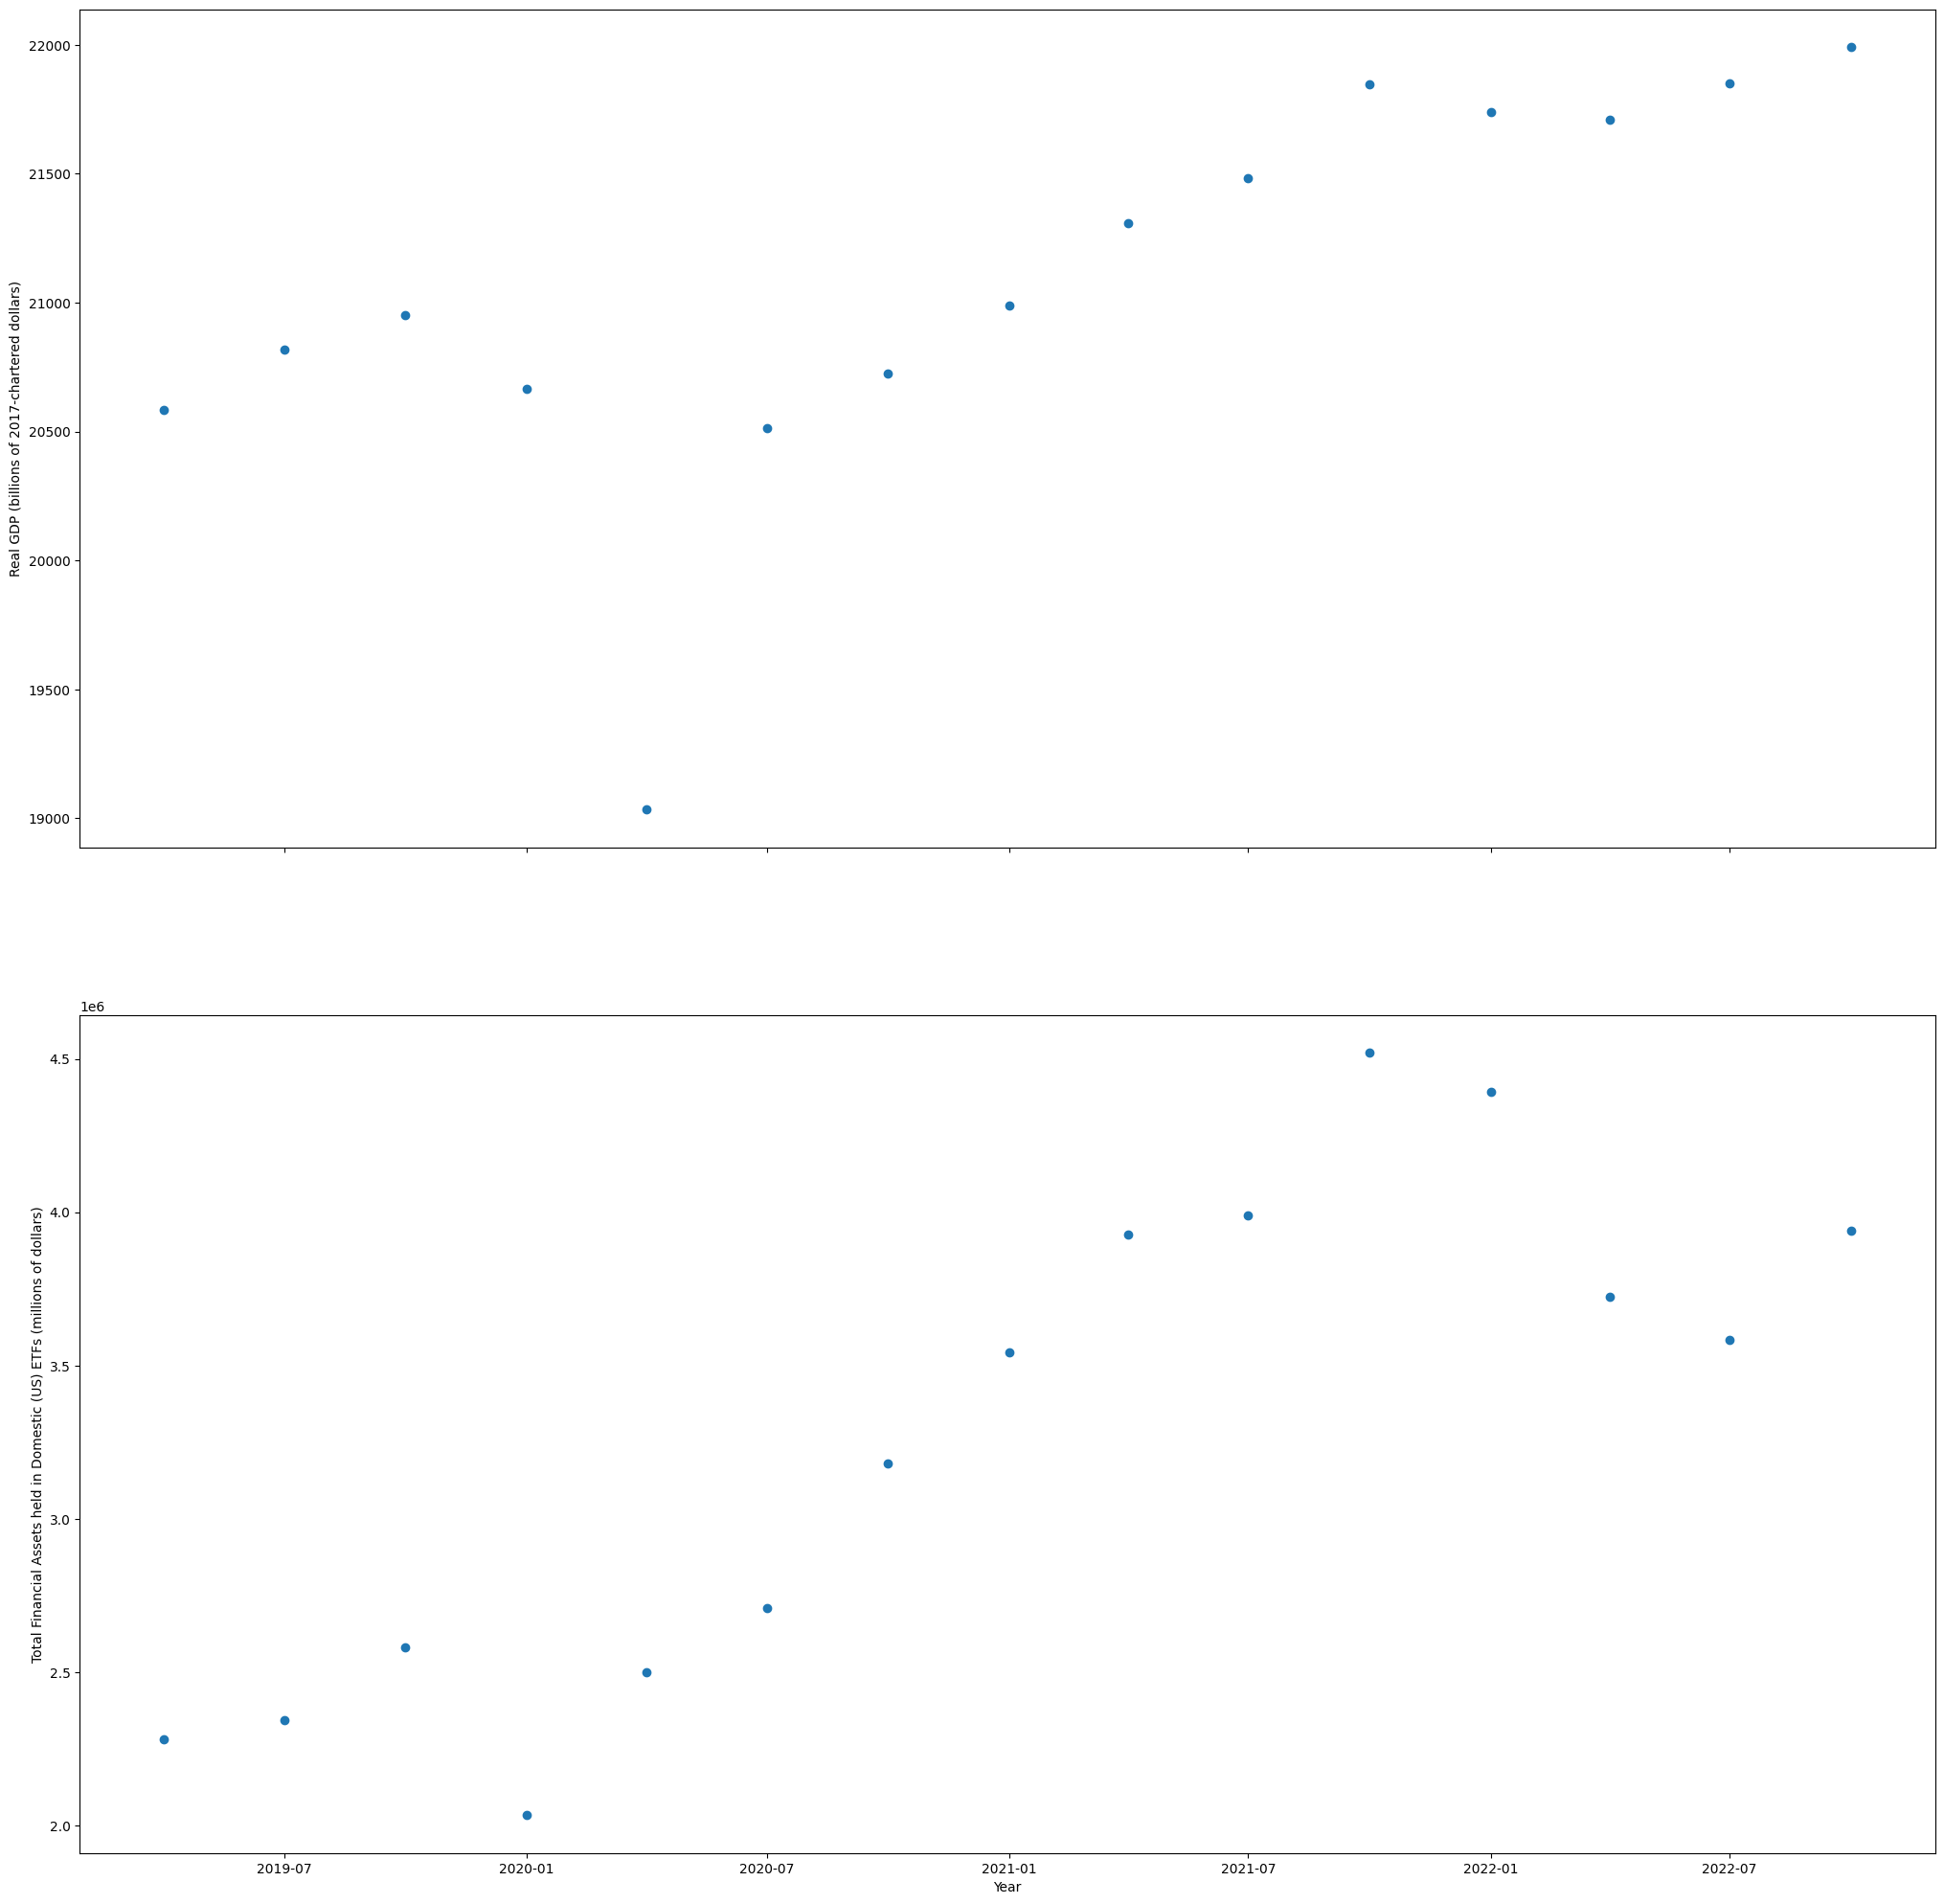

In [ ]:
etf_data = etf_data.merge(US_GDP_data, on='DATE', how='right').fillna(0)
fig, ax = plt.subplots(2, 1, figsize=(25,25), sharex=True)
# fig, ax = plt.subplots(2, 1, figsize=(15,15))
plt.xlabel('Year')
ax[0].scatter(etf_data['DATE'], etf_data['GDPC1'])
ax[1].scatter(etf_data['DATE'], etf_data['BOGZ1LM564091600Q'])
# ax[0].set_xlabel('Year')
# ax[1].set_xlabel('Year')
ax[0].set_ylabel('Real GDP (billions of 2017-chartered dollars)')
ax[1].set_ylabel('Total Financial Assets held in Domestic (US) ETFs (millions of dollars)')
plt.show()

**Credit Risk Management Step #2: How Likely is our Borrower to Default on his Loan?**

Estimating the expected probability that our borrower fails to commit completely to his loan will require additional information beyond the macroscopic trends of real economic growth and the total amount of financial assets held in ETFs. We would need additional information either about the delinquency rate of loans issued by credit vendors and lending institutions for trading purposes. However, this data is difficult to obtain in the public domain and can be measured by niche metrics and parameters that would not be generalizable for all situations and credit vendors. Hence, we use as a proxy the amount of receivables owed by borrowers who engage in ETF trading.

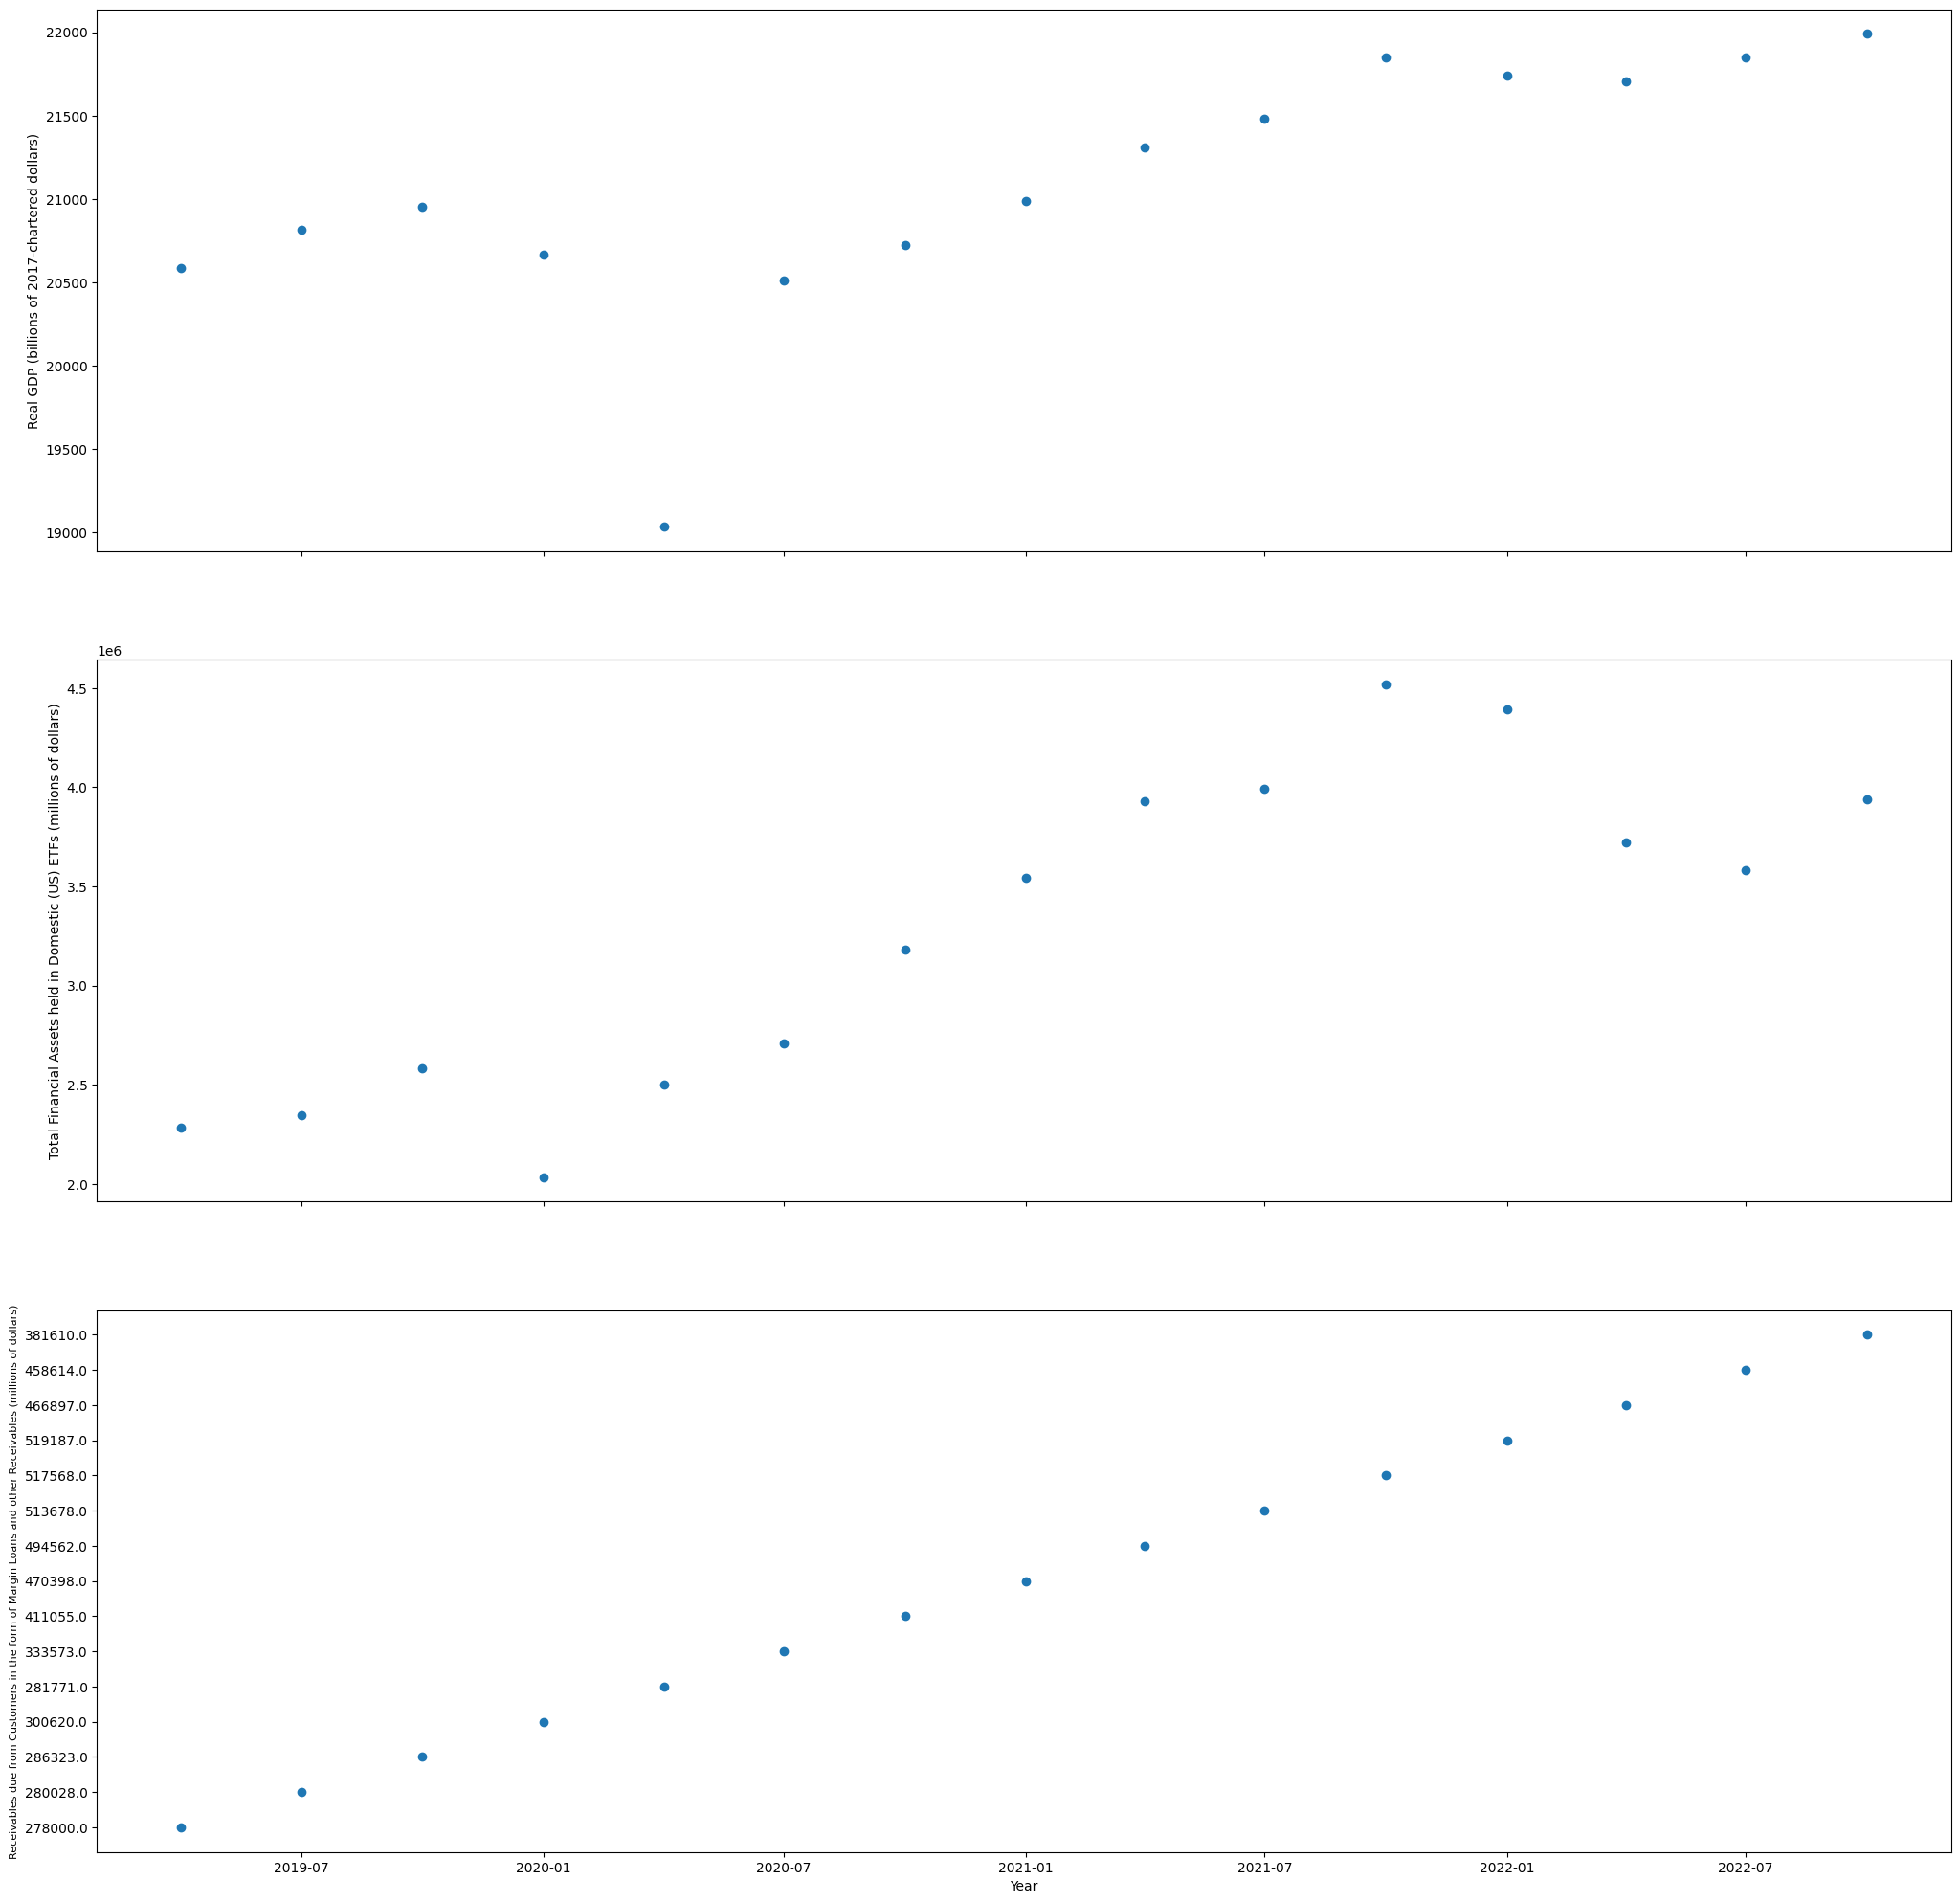

In [ ]:
# Reload the ETF dataset as its properties have changed in the previous cell
etf_data = pd.read_csv("BOGZ1LM564091600Q.csv")
# Standardize its time window and merge it with the mortgage default rates dataset alongside other important datasets
etf_data = standardize_timesteps(start_date, end_date, etf_data)
etf_data = pd.merge(pd.merge(etf_data,US_GDP_data,on='DATE'),margin_loan_data,on='DATE').fillna(0)
fig, ax = plt.subplots(3, 1, figsize=(25,25), sharex=True)
# fig, ax = plt.subplots(2, 1, figsize=(15,15))
ax[0].scatter(etf_data['DATE'], etf_data['GDPC1'])
ax[1].scatter(etf_data['DATE'], etf_data['BOGZ1LM564091600Q'])
ax[2].scatter(etf_data['DATE'], etf_data['BOGZ1FL663067003Q'])
plt.xlabel('Year')
# ax[0].set_xlabel('Year')
# ax[1].set_xlabel('Year')
# ax[2].set_xlabel('Year')
ax[0].set_ylabel('Real GDP (billions of 2017-chartered dollars)')
ax[1].set_ylabel('Total Financial Assets held in Domestic (US) ETFs (millions of dollars)')
ax[2].set_ylabel('Receivables due from Customers in the form of Margin Loans and other Receivables (millions of dollars)', fontsize=8)
plt.show()

We thus observe that the concurrent trends of increasing real GDP and increasing amount of financial assets being held in ETF transactions indicate that there is a growing interest to engage in ETF trading again; a movement that our borrower is more likely than not to be a part of as well considering that he engages frequently in margin trading both for personal and professional reasons. The rising trend in amount due from customers in the form of margin loans and other receivables applies to his case as well, given that he has yet to fully pay off loans that he has previously committed to, presumably for similar reasons.

**Credit Risk Management Step #3: Do we Lend our ETF to this Borrower?**

Given the fact that he has not been able to fully finance loans that he has taken up for various purposes, there is no guarantee that the borrower in our scenario can commit to financing the securities loan that he has applied for. The credit lending team would only be able to obtain more assurance for him once he has demonstrated his ability to free himself of his existing loan obligations and, hence, will have to decline his application at this time. Declining his application would prove to be a correct call of action as he would subsequently lose his job 2 months later and be unable to finance the loan; had our lending firm proceeded to approve his loan application, we would have incurred losses from his failure to commit.

# **Additional Note: In the Event of a Financial Crisis**

Our analysis of the two scenarios above assumes normal economic fluctuations in which massive economic shocks such as financial crises have not yet occurred and are not main factors influencing consumer behaviour. However, these shock events be characterized by large numbers of borrowers defaulting on their loans, putting our lending firm in a precarious position. It is in the interests of our firm to have sufficient diversification in our demographic of borrowers as well as in our securities portfolios to hedge against the impact of fallout from such events, and to also possess sufficient reserves as stipulated by government guidelines to reduce our likelihood of having to default should diversification methods fail.